![](imagenes/UC_FMRI.jpg)

---

***Andres Eduardo Aracena Rangel***

---

# Mascara del liquido cefalorraquídeo

En el notebook ***visualizacion_mascara.ipynb*** se pudo demostrar como en principio podemos extraer una mascara del liquido cefalorraquídeo trabajando con las imagenes/matrices obtenidas del ***reconall*** de freesurfer; con los datos de ***wm.mgz*** y ***wm.seg.mgz***.

En esta oportunidad, vamos a extraer el volumen de la mascara del liquido cefalorraquídeo (mask_csf).

Recordemos que la ubicación de la carpeta de freesurfer

In [1]:
%ls /home/aracena/thesis_practica/tips_nibabel/3_recon-all_freesurfer/output/freesurfer/sub-01/mri/

antsdn.brain.mgz                         norm.mgz
aparc.a2009s+aseg.mgz                    nu.mgz
aparc+aseg.mgz                           orig/
aparc.DKTatlas+aseg.mgz                  orig.mgz
aseg.auto.mgz                            orig_nu.mgz
aseg.auto_noCCseg.label_intensities.txt  rawavg.mgz
aseg.auto_noCCseg.mgz                    rh.ribbon.mgz
aseg.mgz                                 ribbon.mgz
aseg.presurf.hypos.mgz                   segment.dat
aseg.presurf.mgz                         surface.defects.mgz
brain.finalsurfs.mgz                     T1.mgz
brainmask.auto.mgz                       talairach.label_intensities.txt
brainmask.mgz                            talairach.log
brain.mgz                                talairach_with_skull.log
ctrl_pts.mgz                             transforms/
filled.auto.mgz                          wm.asegedit.mgz
filled.mgz                               wm.mgz
lh.ribbon.mgz                            wmparc.mgz
mri_nu_correct.mni.log     

## Importamos librerias

In [2]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [3]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)
from matplotlib.figure import Figure
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage #para rotar img

## Definimos funciones

In [4]:
# Creamos una funcion para ingresar el corte/slice que se desea extraer
# Verificamos que el usuario ingrese un numero natural y que se encuentre entre los 
    # cortes de la imagen cargada
    
def ingresar_corte(name, v_ini, v_fin):
    while True:
        print('\n------------------------------------------\n')
        print('La imagen', name, 'posee', vol_fin, 'cortes/slices', '\n',
             'ingrese un valor entre 0 y', vol_fin)
        print('\n------------------------------------------')
        co_vo =  input('\n Ingrese el corte/slice que desea visualizar: ')
        ver_num = co_vo.isnumeric()
        if ver_num == True: 
            co_vo = int(co_vo) # covertimos a int para poder usar en sentencias
            if v_ini <= co_vo <= v_fin: # que se encuentre los volumenes
                print('\n------------------------------------------\n')
                print('El corte/slice', co_vo, 'sera visualizado')
                print('\n------------------------------------------')
                return co_vo
                break
            else:
                print('\nERROR. Se debe ingresar un numero natural y',
                          '\n entre la cantidad de cortes/slices')
        else:
            print('\nERROR. Se debe ingresar un numero natural y',
                          '\n entre la cantidad de cortes/slices')

## Definimos parámetros

In [5]:
# Ruta del directorio del proyecto
experiment_dir = '/home/aracena/thesis_practica/tips_nibabel/' 

# Ruta de resultados de recon-all de freesurfer con segmentaciones
freesurfer_dir = opj(experiment_dir,'3_recon-all_freesurfer','output','freesurfer','sub-01','mri')

'''
Ruta de la imagen segmentada de la materia blanca + liquido cefalorraquídeo
'''
path_wm_csf = opj(freesurfer_dir,'wm.mgz')

'''
Ruta de la imagen segmentada solo materia blanca
'''
path_wm = opj(freesurfer_dir,'wm.seg.mgz')

'''
Ruta donde se guardaran los resultados
'''
output_dir = opj(experiment_dir,'5_mascara_csf','output')

# Crear la carpeta de salida
os.system('mkdir -p %s'%output_dir)

0

## Cargamos las imagenes y creamos los objetos mask_X

In [8]:
mask_wm_csf = nib.load(path_wm_csf)

mask_wm = nib.load(path_wm)


'''
Atributos
'''

# Forma de la Matriz
form_mask_wm_csf = mask_wm_csf.shape # Atributo --> Forma Matriz
print('Forma de la matriz mask_wm_csf:', '\n', form_mask_wm_csf, '------>', '3D', '\n')

form_mask_wm = mask_wm.shape # Atributo --> Forma Matriz
print('Forma de la matriz mask_wm:', '\n', form_mask_wm, '------>', '3D', '\n')

header = mask_wm.header
print(header)

Forma de la matriz mask_wm_csf: 
 (256, 256, 256) ------> 3D 

Forma de la matriz mask_wm: 
 (256, 256, 256) ------> 3D 

<class 'nibabel.freesurfer.mghformat.MGHHeader'> object, endian='>'
version      : 1
dims         : [256 256 256   1]
type         : 0
dof          : 1
goodRASFlag  : 1
delta        : [1. 1. 1.]
Mdc          : [[-1.0000000e+00  1.8626451e-09  1.8626451e-09]
 [ 0.0000000e+00 -3.4924597e-10 -1.0000001e+00]
 [-1.8626451e-09  1.0000001e+00 -2.0954758e-09]]
Pxyz_c       : [ -1.1771622  -2.6360626 -37.204857 ]
tr           : 0.0
flip_angle   : 0.0
te           : 0.0
ti           : 0.0
fov          : 256.0


## Cargamos datos de las imagenes

In [14]:
datos_mask_wm_csf = mask_wm_csf.get_fdata()
datos_mask_wm = mask_wm.get_fdata()


# Numero de elementos
cant_wm_csf = datos_mask_wm_csf.size # Atributo np --> Numero de elementos Matriz
print('Numero de elementos de la mask_wm_csf:', '\n', cant_wm_csf, '\n')

cant_wm = datos_mask_wm.size # Atributo np --> Numero de elementos Matriz
print('Numero de elementos de la mask_wm:', '\n', cant_wm, '\n')


#
print(datos_mask_wm.dtype)
#
print(datos_mask_wm_csf.dtype)
#
print(np.amin(datos_mask_wm_csf))
print(np.amax(datos_mask_wm_csf))
#
print(np.amin(datos_mask_wm))
print(np.amax(datos_mask_wm))

Numero de elementos de la mask_wm_csf: 
 16777216 

Numero de elementos de la mask_wm: 
 16777216 

float64
float64
0.0
250.0
0.0
230.0


## Extraemos datos de la mascara de csf

In [18]:
# extraemos mascara de csf
mask_csf = np.subtract(datos_mask_wm_csf,datos_mask_wm)

#atributo
form_mask_csf = mask_csf.shape
#print(form_mask_csf)

## Extraemos cortes de la mascara de csf

In [19]:
# Le indicamos al usuario que ingrese el corte/slice que desea extraer del
# volumen seleccionado

# Definimos los inputs de la funcion 'ingresar_corte'
name = 'mask_csf'
vol_in = 0 # volumen inicial --> v_ini
vol_fin = form_mask_csf[2] # volumen final --> v_fin

# Usamos funcion
cor_sel = ingresar_corte(name,vol_in,vol_fin)


------------------------------------------

La imagen mask_csf posee 256 cortes/slices 
 ingrese un valor entre 0 y 256

------------------------------------------

 Ingrese el corte/slice que desea visualizar: 115

------------------------------------------

El corte/slice 115 sera visualizado

------------------------------------------


## Visualizamos los cortes

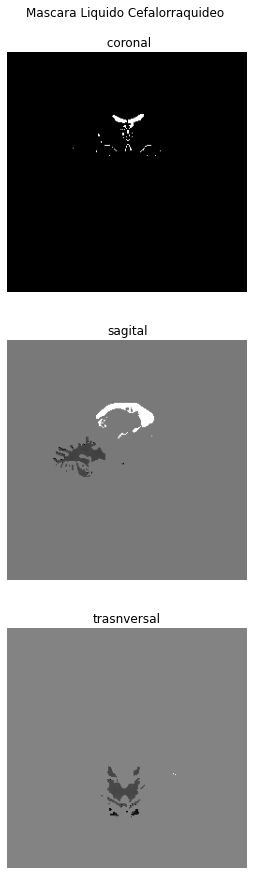

In [20]:
'''
corte coronal
'''
coro_csf = mask_csf[:, :,cor_sel]


#rotada
coro_csf_r = ndimage.rotate(coro_csf, -90, reshape=True)


'''
corte sagital
'''
sagi_csf = mask_csf[cor_sel,:, :]


#rotada
sagi_csf_r = ndimage.rotate(sagi_csf, 0, reshape=True)


'''
corte transversal
'''
tran_csf = mask_csf[:,cor_sel, :]

#rotada
tran_csf_r = ndimage.rotate(tran_csf, 90, reshape=True)



'''
Mostramos las imagenes
'''

fig = plt.figure(figsize=(15, 15))
plt.subplot(3,1,1)
plt.imshow(coro_csf_r,cmap='gray')
plt.title('Mascara Liquido Cefalorraquideo \n\n coronal')
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(sagi_csf_r,cmap='gray')
plt.title('sagital')
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(tran_csf_r,cmap='gray')
plt.title('trasnversal')
plt.axis('off')
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [21]:
np.amin(mask_csf)

-230.0

In [30]:
np.amax(mask_csf)

250.0

# FIN